In [1]:
import torch
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

model_type = "vit_t"
sam_checkpoint = "./weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()
predictor = SamPredictor(mobile_sam)

image = np.asarray(PIL.Image.open("dog.jpg").convert("RGB"))
predictor.set_image(image)

mask, _, _ = predictor.predict(np.array([
        [1000, 750]
    ]), point_labels=np.array([1])
)




/home/jetson/.local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/jetson/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/jetson/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import time
import torch

In [ ]:

torch.cuda.current_stream().synchronize()
t0 = time.monotonic()
for i in range(20):
    image = np.asarray(PIL.Image.open("dog.jpg").convert("RGB"))
    predictor.set_image(image)
    mask, _, _ = predictor.predict(np.array([
            [1000, 750]
        ]), point_labels=np.array([1])
    )
torch.cuda.current_stream().synchronize()
t1 = time.monotonic()

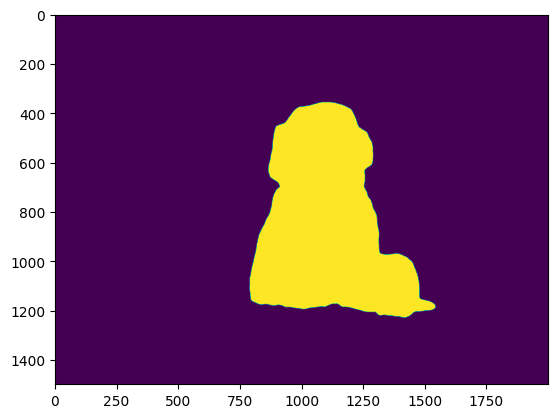

In [2]:
plt.imshow(mask[1])
plt.show()